In [1]:
import pandas as pd # data analysis and manipulation tool
import numpy as np # Numerical computing tools
import seaborn as sns  # visualization library
import matplotlib.pyplot as plt  # another visualization library

# Start with reading the db, filtering outliers and filling the missing data

In [2]:
df = pd.read_csv('protein.csv', sep=',', header=0)

In [3]:
df.head(5)

,ID,protein_1,protein_2,protein_3,protein_4,protein_5,protein_6,protein_7,protein_8,protein_9,protein_10
0,0,-1.006417,0.882125,NaN,-2.587934,1.715879,1.720692,-0.465769,1.135213,0.750321,0.627582
1,1,0.772735,-0.961301,1.639747,-2.108846,0.199883,0.568140,1.321528,-0.006901,-2.473787,-0.646808
2,2,-1.052577,-0.104960,1.550213,-2.576606,2.083175,2.015090,0.093019,0.959435,-0.263591,0.535906
3,3,-1.528830,2.176346,-0.214969,-2.021768,-2.962145,-3.295177,2.116420,-1.467550,0.579121,-1.434760
4,4,-1.407823,-1.028772,0.810723,4.052628,-1.700813,1.399962,2.256554,-0.818456,-1.529480,0.754909


In [4]:
df.shape

(494, 11)

In [5]:
df.describe()

,ID,protein_1,protein_2,protein_3,protein_4,protein_5,protein_6,protein_7,protein_8,protein_9,protein_10
count,494.000000,489.000000,476.000000,478.000000,476.000000,480.000000,477.000000,487.000000,485.000000,479.000000,477.000000
mean,246.500000,-0.462127,-1.173895,-0.227398,1.465577,0.124944,-0.742783,0.362071,-0.200106,-0.923517,0.146468
std,142.749781,6.533040,19.906275,8.062840,17.277465,3.568627,10.348845,5.693674,4.410810,13.786652,1.662280
min,0.000000,-96.469898,-407.526638,-123.628501,-241.013809,-27.873525,-150.310102,-39.718672,-92.917408,-246.757608,-2.431825
25%,123.250000,-1.018382,-0.948167,-0.666352,-2.263689,-1.710851,-1.741266,-0.788513,-0.818456,-1.048256,-0.637084
50%,246.500000,-0.313710,-0.225694,0.104332,1.745072,-0.347418,-0.696808,-0.100930,-0.082172,0.039068,0.043498
75%,369.750000,0.548909,0.496533,0.817167,3.499794,2.251205,1.240977,0.749700,0.670535,0.872264,0.643888
max,493.000000,15.321833,69.568058,61.466833,208.838313,40.658268,64.340135,87.208302,11.370135,54.358368,23.258043


### for now, fill the NaN with the mean values. And replace the outliers with the mean values

Using the box plot to discover the outliers for some protein:

<AxesSubplot:xlabel='protein_3'>

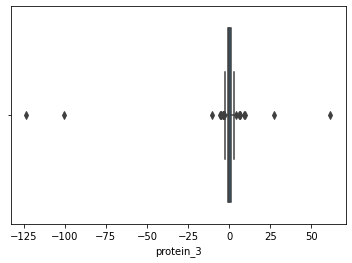

In [6]:
sns.boxplot(x=df['protein_3'])

I will use the z-value to filter outliers:
The Z-score is the signed number of standard deviations
by which the value of an observation or data point is 
above the mean value of what is being observed or measured.

To use the Z-value, i drop all the NaN rows.

In [9]:
df_nonan = df.dropna()

In [10]:
df_nonan.shape

(373, 11)

In [11]:
from scipy import stats
z = np.abs(stats.zscore(df_nonan))

In [12]:
threshold = 3
outliers_arr = np.where(z > 3)
print(outliers_arr)

(array([ 43,  52,  66,  98, 114, 128, 150, 156, 173, 196, 209, 215, 219,
       223, 236, 241, 265, 269, 276, 276, 286, 287, 289, 298, 304, 305,
       323, 340, 349, 349, 363], dtype=int64), array([ 9,  6,  1,  9,  5,  8,  9,  1,  4,  1,  7,  6,  8, 10,  2,  5,  9,
        3,  3,  7,  3,  7,  3,  2,  6, 10,  8, 10,  4,  5,  4],
      dtype=int64))


In [13]:
# outliers_arr[0] - the rows numbers
# outliers_arr[1] - the columns numbers

In [14]:

from copy import copy
protein_keys = ['protein_1', 'protein_2', 'protein_3', 'protein_4', 'protein_5',
       'protein_6', 'protein_7', 'protein_8', 'protein_9', 'protein_10']

# threshold sets the limit = std*threshold, beyond which the outliers are detected
threshold = 2

for key in protein_keys:
    
    new_df = df[['ID',key]].copy()
    
    # remove nans
    new_df = new_df.dropna()
    
    IDs_list = list(new_df.ID)
    
    z = np.abs(stats.zscore(new_df[key]))
    outliers_arr = np.where(z > threshold)
    
    if len(outliers_arr[0]) != 0:
        
        
#         print("\n")
#         print(outliers_arr)

        # printing those outlier values
        for outlier_idx in outliers_arr[0]:
#             print(new_df[key][IDs_list[outlier_idx]])

            # dropping those rows from the new_df
            new_df = new_df.drop(IDs_list[outlier_idx])
            
    else:
        pass # no outliers were detected
        
    
    # find the mean WITHOUT the outliers
    new_mean = new_df[key].mean()
    # print(f"new_mean = {new_mean} for key {key}")
    
    # fill the outliers in the original df with mean
#     print("\n\nOriginal dataset")
    for outlier_idx in outliers_arr[0]:
        
        # dropping those rows from the new_df
        # print(f"Replacing for ID {IDs_list[outlier_idx]} at key {key}")
        # df.loc[:, ('ID', key)].at[IDs_list[outlier_idx], key] = new_mean
        df.at[IDs_list[outlier_idx], key] = new_mean
    
    
        
    
    
    
    

## Box plot looks much better

<AxesSubplot:xlabel='protein_3'>

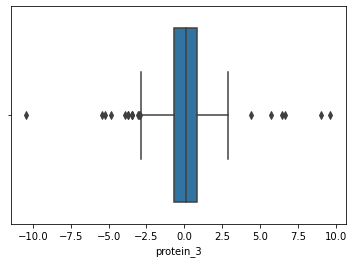

In [15]:
sns.boxplot(x=df['protein_3'])

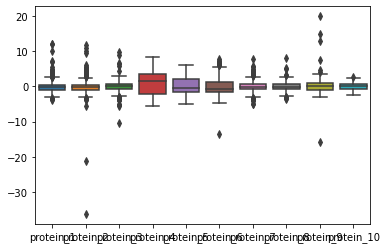

In [16]:
ax = sns.boxplot(data=df.drop(columns="ID"))

## Filling the NaN values with the correct mean values

In [17]:
df = df.fillna(df.mean())

In [18]:
df.to_csv('protein_fixed.csv', sep=',', header=True, index=False)

# CLUSTERING

In [27]:
from sklearn.cluster import KMeans
import numpy as np
X = df.drop(['ID'], axis=1).values
kmeans = KMeans(n_clusters=5, random_state=0).fit(X)

In [28]:
from sklearn.decomposition import PCA

reduced_data = PCA(n_components=2).fit_transform(X)

### user the scaller on the same plot for each class

In [29]:
labels_kmeans = kmeans.labels_

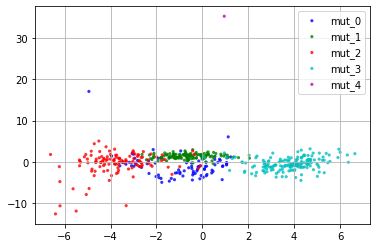

In [30]:
# plot scatter for each class
import matplotlib.pyplot as plt

colors = ('b', 'g', 'r', 'c', 'm')


fig, ax = plt.subplots()

for idx in range(5):
    color = colors[idx]
    
    class_idx = [index for index, val in enumerate(labels_kmeans) if val == idx]

    
    x = reduced_data[class_idx,0]
    y = reduced_data[class_idx,1]
    

    ax.scatter(x, y, c=color, s=10, label=f"mut_{idx}",
               alpha=0.8, edgecolors='none')


ax.legend()
ax.grid(True)

plt.show()


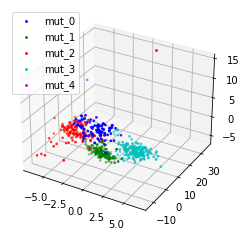

In [31]:

reduced_data_3d = PCA(n_components=3).fit_transform(X)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


for idx in range(5):
    color = colors[idx]
    
    class_idx = [index for index, val in enumerate(labels_kmeans) if val == idx]

    
    x = reduced_data_3d[class_idx,0]
    y = reduced_data_3d[class_idx,1]
    z = reduced_data_3d[class_idx,2]
    

    ax.scatter(x, y, z, c=color, label=f"mut_{idx}", s=3)


ax.legend()
ax.grid(True)

plt.show()

# Spectral Clustering

some example from the internet:
https://numpy.org/doc/stable/reference/generated/numpy.argsort.html

Example from sklearn:
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html#sklearn.cluster.SpectralClustering

### Now trying on our dataset

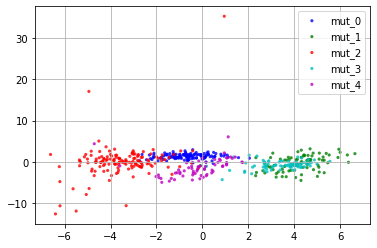

In [32]:
from sklearn.cluster import SpectralClustering

X = df.drop(['ID'], axis=1).values

clustering_virus = SpectralClustering(n_clusters=5,
        affinity='nearest_neighbors',
        assign_labels="discretize",
        random_state=0).fit(X)

labels_spectral = clustering_virus.labels_


### Using PCA again to vizualize the clusters

# plot scatter for each class
import matplotlib.pyplot as plt

colors = ('b', 'g', 'r', 'c', 'm')

fig, ax = plt.subplots()

for idx in range(5):
    color = colors[idx]
    
    class_idx = [index for index, val in enumerate(labels_spectral) if val == idx]

    
    x = reduced_data[class_idx,0]
    y = reduced_data[class_idx,1]
    

    ax.scatter(x, y, c=color, s=10, label=f"mut_{idx}",
               alpha=0.8, edgecolors='none')


ax.legend()
ax.grid(True)

plt.show()



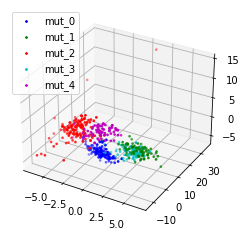

In [33]:

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


for idx in range(5):
    color = colors[idx]
    
    class_idx = [index for index, val in enumerate(labels_spectral) if val == idx]

    
    x = reduced_data_3d[class_idx,0]
    y = reduced_data_3d[class_idx,1]
    z = reduced_data_3d[class_idx,2]
    

    ax.scatter(x, y, z, c=color, label=f"mut_{idx}", s=3)


ax.legend()
ax.grid(True)

plt.show()

In fact those results look better than the ones with K-means. To validate we use the silhouette score.

In [34]:
from sklearn import metrics

metrics_list = ['l1', 'l2', 'cosine']

for metric in metrics_list:

    kmeans_score = metrics.silhouette_score(X, labels_kmeans, metric=metric)
    spectral_score = metrics.silhouette_score(X, labels_spectral, metric=metric)

    print(f"Metric: {metric}")
    print(f"\tkmeans_score = {round(kmeans_score,3)}")
    print(f"\tspectral_score = {round(spectral_score,3)}")

Metric: l1
	kmeans_score = 0.244
	spectral_score = 0.264
Metric: l2
	kmeans_score = 0.274
	spectral_score = 0.274
Metric: cosine
	kmeans_score = 0.383
	spectral_score = 0.465


The cosine score seems to be much higher for the spectral. Other metrics seem to be similar

# CHOOSING MOST DOMINANT FEATURES

Now we find the most dominant features. There are 2 ways we test:

- muticlass classification


Using labels of clusters, we train classifier, and reveal the most dominant features used for the classification
- intra-class feature similarity: 


For each feature, we calculate similarity (with some function) of each sample to the centroid in this class
If the similarity for a spefic feature is high (distances are low), the feature is highly relevant for the class separation

## intra-class feature similarity

In [35]:
# Start with intra-class feature similarity
import math 

# euclidean distance for instance
def calc_similarity(feature_val, centroid_val):
    sigma = 0.5
    distance = np.linalg.norm(feature_val-centroid_val)
    return np.exp(-distance/(sigma**2))

results = np.zeros((5,10))

for class_idx in range(5):
    
    # get the indexes of this specific class
    class_labels = [relevant_class for relevant_class in range(len(labels_spectral)) if labels_spectral[relevant_class] == class_idx]    
    
    for feature_idx in range(10):  
        
        # list of all the feature values for this specific class
        feature_class_mx = X[class_labels, feature_idx]
        
        # find the mean 
        class_feature_mean = np.mean(feature_class_mx)
        
        similarity = 0
        
        for feature in range(len(class_labels)):
            similarity += calc_similarity(feature_class_mx[feature], class_feature_mean)
            
        
        results[class_idx, feature_idx] = similarity
        



In [36]:
print("RESULTS\n")
from tabulate import tabulate

headers = [f"feature_{idx}" for idx in range(10)]
rowIDs = range(5)


table = tabulate(results, headers, floatfmt=".4f", showindex=rowIDs)
print(table)


RESULTS

      feature_0    feature_1    feature_2    feature_3    feature_4    feature_5    feature_6    feature_7    feature_8    feature_9
--  -----------  -----------  -----------  -----------  -----------  -----------  -----------  -----------  -----------  -----------
 0      23.8137      48.1040      30.6037      26.7614      18.6588      30.1430      38.3912      34.4244      31.5488      34.5134
 1      10.4001       4.6729      17.1727      13.6686      10.9773      15.8478      13.7608      16.3426      15.0797      11.0455
 2      18.5702      13.3773      28.8274      20.8975      21.3384      14.4191      13.9943      31.2614      30.7570      46.0173
 3      10.2249      16.7257       7.6672      13.1696      16.9422       9.4987      19.6781      16.2120      13.1462      18.4031
 4      10.7968       9.6070       8.9518      12.5893       9.7714       4.0149      15.7515      15.6602      10.1348      11.5545


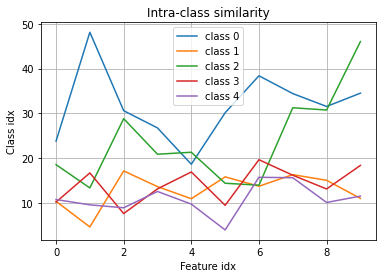

In [27]:
import matplotlib. pyplot as plt


features_idx = range(10)
for i in range(5):
     plt.plot(features_idx, results[i,:], label = f"class {i}")

plt.xlabel('Feature idx')
plt.ylabel('Class idx')
plt.title('Intra-class similarity')
plt.legend()
plt.grid(True)
plt.show()


In [28]:
indexes_sort = np.argsort(results, kind='quicksort', axis=1)

results_sorted = np.zeros((5,10))

for class_idx in range(5):
    for order_idx in range(10):
        
        feature_in_order = indexes_sort[class_idx, order_idx]
        
        results_sorted[class_idx, feature_in_order] = order_idx

In [29]:
table = tabulate(results_sorted, headers, floatfmt=".0f", showindex=rowIDs)
print(table)

      feature_0    feature_1    feature_2    feature_3    feature_4    feature_5    feature_6    feature_7    feature_8    feature_9
--  -----------  -----------  -----------  -----------  -----------  -----------  -----------  -----------  -----------  -----------
 0            1            9            4            2            0            3            8            6            5            7
 1            1            0            9            4            2            7            5            8            6            3
 2            3            0            6            4            5            2            1            8            7            9
 3            2            6            0            4            7            1            9            5            3            8
 4            5            2            1            7            3            0            9            8            4            6


### we are looking for features with highest similarity score. The score of 9 means this feature is very dominant at specific class classification


- Feature 1:  dominant for class 0 -> take
- Feature 2:  dominant for class 1 -> take 
- Feature 6:  dominant for class 1,3 -> take
- Feature 7:  important -> take
- Feature 9:  dominant for class 2 -> take



To validate the results, let's take only those features and try to make a classification again

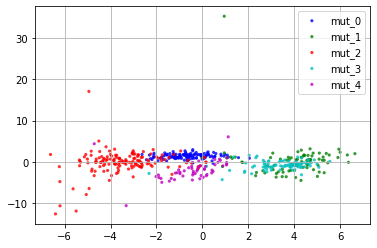

In [41]:
X = df.drop(['ID'], axis=1).values
features_rows = [3, 4, 5, 7, 8]
# features_rows = [1,2,6,7,9]
X_new = X[:, features_rows]

clustering_virus_truncated = SpectralClustering(n_clusters=5,
        affinity='nearest_neighbors',
        assign_labels="discretize",
        random_state=0).fit(X_new)

labels_spectral_truncated = clustering_virus_truncated.labels_


### Using PCA again to vizualize the clusters

# plot scatter for each class
import matplotlib.pyplot as plt

colors = ('b', 'g', 'r', 'c', 'm')

fig, ax = plt.subplots()

for idx in range(5):
    color = colors[idx]
    
    class_idx = [index for index, val in enumerate(labels_spectral_truncated) if val == idx]

    
    x = reduced_data[class_idx,0]
    y = reduced_data[class_idx,1]
    

    ax.scatter(x, y, c=color, s=10, label=f"mut_{idx}",
               alpha=0.8, edgecolors='none')


ax.legend()
ax.grid(True)

plt.show()



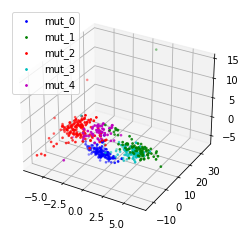

In [43]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


for idx in range(5):
    color = colors[idx]
    
    class_idx = [index for index, val in enumerate(labels_spectral_truncated) if val == idx]
    
    x = reduced_data_3d[class_idx,0]
    y = reduced_data_3d[class_idx,1]
    z = reduced_data_3d[class_idx,2] 

    ax.scatter(x, y, z, c=color, label=f"mut_{idx}", s=3)


ax.legend()
ax.grid(True)

plt.show()

In [44]:
from sklearn import metrics

metrics_list = ['l1', 'l2', 'cosine']

for metric in metrics_list:

    kmeans_score = metrics.silhouette_score(X, labels_kmeans, metric=metric)
    spectral_score = metrics.silhouette_score(X, labels_spectral, metric=metric)
    spectral_score_truncated = metrics.silhouette_score(X, labels_spectral_truncated, metric=metric)

    print(f"Metric: {metric}")
    print(f"\tkmeans_score = {round(kmeans_score,3)}")
    print(f"\tspectral_score_1 = {round(spectral_score,3)}")
    print(f"\tspectral_score_2 = {round(spectral_score_truncated,3)}")

Metric: l1
	kmeans_score = 0.244
	spectral_score_1 = 0.264
	spectral_score_2 = 0.268
Metric: l2
	kmeans_score = 0.274
	spectral_score_1 = 0.274
	spectral_score_2 = 0.281
Metric: cosine
	kmeans_score = 0.383
	spectral_score_1 = 0.465
	spectral_score_2 = 0.464


#### We can see that using only 5 features out of 10 will not give the same scores as using all of them

## muticlass classification

We will train some classifier and detect the most dominant features it used for the classification. I will use the labels from the Spectral Clustering with 10 features

source : https://machinelearningmastery.com/feature-selection-in-python-with-scikit-learn/

First we use the RFE - Recursive Feature Elimination. It works by recursively removing attributes and building a model on those attributes that remain. It uses the model accuracy to identify which attributes (and combination of attributes) contribute the most to predicting the target attribute.

In [45]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, labels_spectral, test_size=0.15, random_state=42)

models_to_test = [LogisticRegression(), DecisionTreeClassifier(), ExtraTreesClassifier()]

support_mx = np.zeros((3, 10)) 
ranking_mx = np.zeros((3, 10))
acc_mx = np.zeros((3,1))

for idx, model in enumerate(models_to_test):


    # create the RFE model and select 5 attributes
    rfe = RFE(model, n_features_to_select=5)
    rfe = rfe.fit(X_train, y_train)

    support_mx[idx, :] = rfe.support_
    ranking_mx[idx, :] = rfe.ranking_

    y_pred = rfe.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    acc_mx[idx] = acc


rowIDs = ["LR", "DTC", "ETC"]
table = tabulate(support_mx, headers, showindex=rowIDs)
print("\n\nSUPPORT MATRIX. 1 = Take this feature\n")
print(table)

table = tabulate(ranking_mx, headers, showindex=rowIDs)
print("\n\nRANKING MATRIX. 1 = Good feature!\n")
print(table)

table = tabulate(acc_mx, ['Accuracy'], showindex=rowIDs)
print("\n\nAccuracy on test set\n")
print(table)



SUPPORT MATRIX. 1 = Take this feature

       feature_0    feature_1    feature_2    feature_3    feature_4    feature_5    feature_6    feature_7    feature_8    feature_9
---  -----------  -----------  -----------  -----------  -----------  -----------  -----------  -----------  -----------  -----------
LR             0            0            1            1            1            1            0            0            1            0
DTC            0            0            0            1            1            1            1            0            1            0
ETC            0            0            0            1            1            1            0            1            1            0


RANKING MATRIX. 1 = Good feature!

       feature_0    feature_1    feature_2    feature_3    feature_4    feature_5    feature_6    feature_7    feature_8    feature_9
---  -----------  -----------  -----------  -----------  -----------  -----------  -----------  -----------  ---------

## Conclusions
Features 3,4,5,7 agreed on all classifiers to be best features. Feature 6 is good feature for LR, which has highest accuracy score.

So from this analysis, best features are 3, 4, 5, 6, 7

From the first analysis of intra-class variation, the best features are 0, 1, 2, 7, 9

seems to be highly not correlated.

### Clustering on the Selected features from the RFE

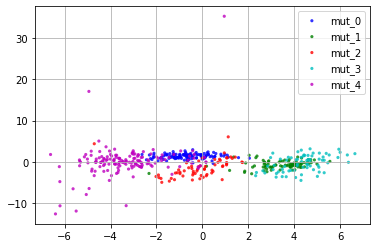

In [51]:
X = df.drop(['ID'], axis=1).values
# features_rows = [3, 4, 5, 7, 8] # classifiers
features_rows = [1, 5, 8, 4, 3] # MI
X_new = X[:, features_rows]

clustering_virus_truncated = SpectralClustering(n_clusters=5,
        affinity='nearest_neighbors',
        assign_labels="discretize",
        random_state=0).fit(X_new)

labels_spectral_truncated = clustering_virus_truncated.labels_


### Using PCA again to vizualize the clusters

# plot scatter for each class
import matplotlib.pyplot as plt

colors = ('b', 'g', 'r', 'c', 'm')

fig, ax = plt.subplots()

for idx in range(5):
    color = colors[idx]
    
    class_idx = [index for index, val in enumerate(labels_spectral_truncated) if val == idx]

    
    x = reduced_data[class_idx,0]
    y = reduced_data[class_idx,1]
    

    ax.scatter(x, y, c=color, s=10, label=f"mut_{idx}",
               alpha=0.8, edgecolors='none')


ax.legend()
ax.grid(True)

plt.show()


### gives really good results

Trying to use the Mutual Information

In [48]:
from sklearn.feature_selection import mutual_info_classif

X = df.drop(['ID'], axis=1).values
MI_scores = mutual_info_classif(X,labels_spectral)

MI_scores_mx = np.zeros((1,10))
MI_scores_srt_mx = np.zeros((1,10))

MI_scores_mx[0, :] = MI_scores
sorted_idx_list = np.argsort(MI_scores)

for srt_idx in range(10):
    MI_scores_srt_mx[0, sorted_idx_list[srt_idx]] = srt_idx

table = tabulate(MI_scores_mx,headers, floatfmt=".4f")
print("\n\nMutual Information\n")
print(table)

table = tabulate(MI_scores_srt_mx, headers, floatfmt=".0f")
print("\n\nMutual Information sorted by value\n")
print(table)

# all give same
# sorted_features_list = sorted(range(10),key=MI_scores.__getitem__)
sorted_features_list = [i[0] for i in sorted(enumerate(MI_scores), key=lambda x:x[1])]

# print("\nHighest MI features:")
# print(sorted_features_list)

print("\nbest_features_list:")
print(sorted_features_list[5:10])



Mutual Information

  feature_0    feature_1    feature_2    feature_3    feature_4    feature_5    feature_6    feature_7    feature_8    feature_9
-----------  -----------  -----------  -----------  -----------  -----------  -----------  -----------  -----------  -----------
     0.1518       0.2878       0.1048       0.8371       0.8003       0.3733       0.1309       0.2091       0.3735       0.1512


Mutual Information sorted by value

  feature_0    feature_1    feature_2    feature_3    feature_4    feature_5    feature_6    feature_7    feature_8    feature_9
-----------  -----------  -----------  -----------  -----------  -----------  -----------  -----------  -----------  -----------
          3            5            0            9            8            6            1            4            7            2

best_features_list:
[1, 5, 8, 4, 3]


Which is similar to the Features found by the RFE (3, 4, 5, 7, 8)

# Choosing the 3 mutations to treat

The best way will be to treat the 3 mutations which are the most prevalent in the dataset

In [36]:

np.unique(labels_spectral)
num_samples = labels_spectral.shape[0]
class_mx = np.zeros((5,1))

for class_test in range(5):
    class_sum = len([i for i in range(num_samples) if labels_spectral[i] == class_test])
    class_mx[class_test, 0] = class_sum

muts_list = [f"Mutation {idx}" for idx in range(5)]    
table = tabulate(class_mx, floatfmt=".0f", headers = ["Num cases"], showindex=muts_list)
print("\n\nNumber of cases for each mutation\n")
print(table)



Number of cases for each mutation

              Num cases
----------  -----------
Mutation 0          126
Mutation 1           78
Mutation 2          146
Mutation 3           80
Mutation 4           64


## conclusion

We will choose to treat mutation 0, 1 and 3

#Silhouette Score



> 


1.   evaluates separation betwen clusters and cohesion within each cluster
2. score -1 to 1 where 1 is best score


> 



https://en.wikipedia.org/wiki/Silhouette_(clustering)

In [52]:
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(X,labels_spectral)

In [53]:
sil_score

0.27360768183407685

Plot silhouette  score for each cluster and silhouette score for entire dataset

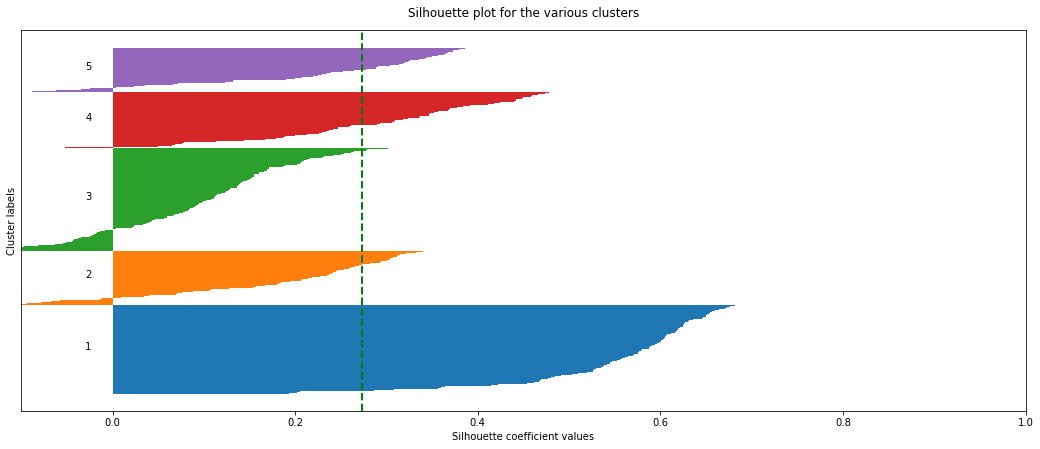

In [54]:
from sklearn.metrics import silhouette_samples
  
fig, ax1 = plt.subplots(1, 1)
fig.set_size_inches(18, 7)
# Get silhouette samples
silhouette_vals = silhouette_samples(X, labels_spectral)

# Silhouette plot
y_ticks = []
y_lower, y_upper = 0, 0
for i, cluster in enumerate(np.unique(labels_spectral)):
    cluster_silhouette_vals = silhouette_vals[labels_spectral == cluster]
    cluster_silhouette_vals.sort()
    y_upper += len(cluster_silhouette_vals)
    ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
    ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
    y_lower += len(cluster_silhouette_vals)

# Get the average silhouette score and plot it
avg_score = np.mean(silhouette_vals)
ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
ax1.set_yticks([])
ax1.set_xlim([-0.1, 1])
ax1.set_xlabel('Silhouette coefficient values')
ax1.set_ylabel('Cluster labels')
ax1.set_title('Silhouette plot for the various clusters', y=1.02);
    

Some more evaluation criteria : https://en.wikipedia.org/wiki/Cluster_analysis#Internal_evaluation

Computes the Davies-Bouldin score.

The score is defined as the average similarity measure of each cluster with its most similar cluster, where similarity is the ratio of within-cluster distances to between-cluster distances. Thus, clusters which are farther apart and less dispersed will result in a better score.

The minimum score is zero, with lower values indicating better clustering.

In [41]:
from sklearn.metrics import davies_bouldin_score

db_score = davies_bouldin_score(X,labels_spectral)
print("The DB score is {0:.2f}".format(db_score)) #lower the better


The DB score is 1.54
